In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carpeta = "data"
ruta = os.path.join(carpeta, "dataset_limpio.csv")
df = pd.read_csv(ruta)

In [3]:
df.columns

Index(['id', 'site', 'job_url_direct', 'title', 'company', 'location',
       'date_posted', 'job_type', 'salary_source', 'interval', 'min_amount',
       'max_amount', 'currency', 'is_remote', 'job_level', 'job_function',
       'listing_type', 'emails', 'description', 'company_industry',
       'company_url_direct', 'company_addresses', 'company_num_employees',
       'company_revenue', 'company_description', 'search_location',
       'search_query', 'stack_tecnologico'],
      dtype='object')

In [4]:
df['job_level'].value_counts()

job_level
mid-senior level    478
entry level         241
not applicable      131
associate           109
internship           49
director              3
executive             3
Name: count, dtype: int64

In [5]:
# 1. Separamos el string en una lista: 'python, sql' -> ['python', 'sql']
# 2. 'Explotamos' la lista: cada elemento pasa a ser una fila propia
# 3. Contamos los valores únicos
conteo_tech = df['stack_tecnologico'].str.split(', ').explode().value_counts()

print(conteo_tech)

stack_tecnologico
python      547
sql         390
ci/cd       299
aws         285
docker      259
           ... 
neo4j         2
presto        2
circleci      2
ionic         1
pig           1
Name: count, Length: 112, dtype: int64


In [6]:
ofertasJunior = df[df['job_level'] == 'entry level']
print(ofertasJunior)
conteo_tech_junior = ofertasJunior['stack_tecnologico'].str.split(', ').explode().value_counts()
print(conteo_tech_junior)

                 id      site  job_url_direct  \
3     li-4371529738  linkedin           False   
4     li-4371465144  linkedin           False   
11    li-4368717838  linkedin           False   
23    li-4365645376  linkedin           False   
28    li-4344988198  linkedin           False   
...             ...       ...             ...   
1240  li-4373504217  linkedin           False   
1254  li-4372326248  linkedin           False   
1255  li-4372328220  linkedin            True   
1256  li-4372340131  linkedin            True   
1257  li-4372334204  linkedin           False   

                                                  title  \
3                            graduate software engineer   
4                         data ops / analytics engineer   
11                                    software engineer   
23    python software engineer - ubuntu hardware cer...   
28                          juju software engineer (go)   
...                                                 ...  

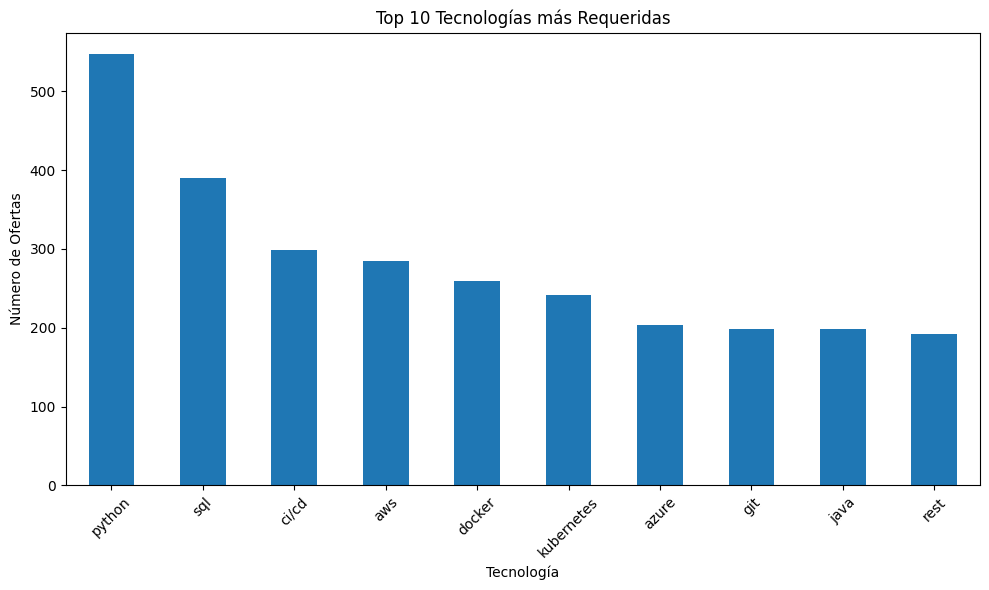

In [7]:
plt.figure(figsize=(10, 6))
conteo_tech.head(10).plot(kind='bar')
plt.title('Top 10 Tecnologías más Requeridas')
plt.xlabel('Tecnología')
plt.ylabel('Número de Ofertas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

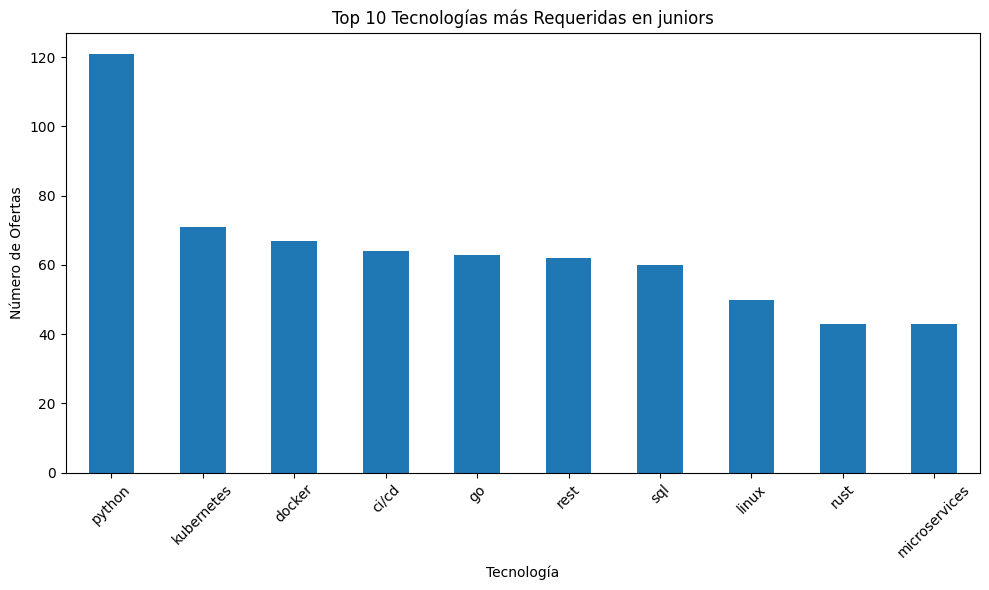

In [8]:
plt.figure(figsize=(10, 6))
conteo_tech_junior.head(10).plot(kind='bar')
plt.title('Top 10 Tecnologías más Requeridas en juniors')
plt.xlabel('Tecnología')
plt.ylabel('Número de Ofertas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
print((ofertasJunior.shape[0]/df.shape[0])*100)

18.931657501963866
